__Reads the model pickle object from Luther Scrapbook and then reads the budget values from the-numbers and joins the tables__

In [3]:
import pandas as pd

html_list = pd.read_html("http://www.the-numbers.com/movie/budgets/all")
df = pd.DataFrame(html_list[0])



In [4]:
header = df.iloc[0]
df = df[1:]
df = df.rename(columns = header)

In [5]:
len(df)

10464

In [7]:
df2 = df.drop(df.columns[0], axis=1)

In [8]:
df2 = df2.dropna()

In [9]:
len(df2)

5232

In [10]:
df2.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
1,12/18/2009,Avatar,"$425,000,000","$760,507,625","$2,783,918,982"
3,12/18/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,058,662,225"
5,5/24/2007,Pirates of the Caribbean: At World's End,"$300,000,000","$309,420,425","$963,420,425"
7,11/6/2015,Spectre,"$300,000,000","$200,074,175","$879,620,923"
9,7/20/2012,The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099"


In [11]:
df2['Production Budget'] = df2['Production Budget'].replace('[\$,]', '', regex=True).astype(float)

with open('model_df.pkl', 'wb') as picklefile:
    pickle.dump(model_df, picklefile)

In [58]:
import pickle
model_df = pickle.load( open( "model_df.pkl", "rb" ) )

In [59]:
model_df.head()

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
0,NaN,Saturn 3,2/15,NaN,NaN,AFD,"$9,000,000",NaN,1980,False,False,False,False,False
1,NaN,Little Miss Marker,3/21,"$853,173",472,Uni.,"$6,321,392",NaN,1980,False,False,False,False,False
2,NaN,The Empire Strikes Back,5/21,"$4,910,483",126,Fox,"$209,398,025","1,278",1980,False,False,False,False,False
3,NaN,Rough Cut,6/20,NaN,NaN,Par.,"$16,656,125",NaN,1980,False,False,False,False,False
4,NaN,The Nude Bomb,5/9,"$3,565,066",793,Uni.,"$14,662,035",NaN,1980,False,False,False,False,False


In [60]:
len(model_df)

3300

In [352]:
model_df[(model_df["Year"]==1996) & (model_df["HasSingle"]==True)]

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
21,NaN,The Preacher's Wife,12/13,"$7,649,752","1,783",BV,"$48,102,795","2,008",1996,True,True,False,True,True
39,NaN,Evita,12/25,"$195,085",2,BV,"$50,047,179","1,045",1996,True,False,False,False,False
42,NaN,Supercop,7/26,"$5,503,176","1,406",Mira.,"$16,270,600","1,469",1996,True,True,False,False,False
47,NaN,Space Jam,11/15,"$27,528,529","2,650",WB,"$90,418,342","2,650",1996,True,True,True,True,True
54,NaN,Set It Off,11/8,"$8,812,105","1,014",NL,"$36,461,139","1,016",1996,True,True,False,False,True
60,NaN,Romeo + Juliet,11/1,"$11,133,231","1,276",Fox,"$46,351,345","1,963",1996,True,True,False,False,False
61,NaN,Fled,7/19,"$5,405,855","2,104",MGM,"$17,193,231","2,104",1996,True,True,False,False,False
65,NaN,Kazaam,7/19,"$5,001,588","2,012",BV,"$18,937,262","2,019",1996,True,True,False,True,False
87,NaN,The Hunchback of Notre Dame,6/21,"$21,037,414","2,778",BV,"$100,138,851","2,835",1996,True,True,False,True,True
88,NaN,High School High,10/25,"$6,311,786","2,146",Sony,"$21,302,121","2,146",1996,True,True,False,False,False


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [357]:
model_df2 = model_df.copy(deep=True)

In [358]:
model_df2['Total Gross'] = model_df2['Total Gross'].replace('[\$,]', '', regex=True).astype(float)

In [389]:
model_df2[model_df2["HasSingle"] ==True]

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
13,NaN,The Jazz Singer,12/19,NaN,NaN,Uni.,27118000.0,NaN,1980,True,True,False,False,False
18,NaN,Coal Miner's Daughter,3/7,"$3,366,443",437,Uni.,67182787.0,NaN,1980,True,False,False,False,False
44,NaN,American Gigolo,2/1,"$3,559,930",570,Par.,22743674.0,NaN,1980,True,False,False,False,False
66,NaN,Xanadu,8/8,"$1,471,595",249,Uni.,22762571.0,NaN,1980,True,True,False,False,False
68,NaN,Foxes,2/29,"$221,141",34,MGM,7470348.0,NaN,1980,True,False,False,False,False
69,NaN,Flash Gordon,12/5,"$3,934,030",823,Uni.,27107960.0,NaN,1980,True,True,False,False,False
20,NaN,Chariots of Fire,9/25,"$68,907",3,Col.,58972904.0,810,1981,True,False,False,False,False
57,NaN,Endless Love,7/17,"$4,163,623",574,Uni.,31184024.0,NaN,1981,True,True,False,False,False
82,NaN,For Your Eyes Only,6/26,"$6,834,967",952,MGM,54812802.0,NaN,1981,True,True,False,False,True
56,NaN,Grease 2,6/11,"$4,645,411","1,250",Par.,15171476.0,"1,250",1982,True,True,False,False,False


In [394]:
model_df2[model_df2["HasSingle"] ==True].sort_values(by=['Total Gross'],ascending=False)

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
58,NaN,Titanic,12/19,"$28,638,131","2,674",Par.,600788188.0,"3,265",1997,True,True,False,False,False
8,11/25,Shrek 2,5/19,"$108,037,878","4,163",DW,441226247.0,"4,223",2004,True,True,False,False,False
64,NaN,Star Wars: Episode I - The Phantom Menace,5/19,"$64,820,970","2,970",Fox,431088295.0,"3,126",1999,True,False,False,False,False
29,12/2,Toy Story 3,6/18,"$110,307,189","4,028",BV,415004880.0,"4,028",2010,True,False,False,False,False
87,9/6,The Hunger Games,3/23,"$152,535,747","4,137",LGF,408010692.0,"4,137",2012,True,True,False,False,True
11,12/19,Spider-Man 2,6/30,"$88,156,227","4,152",Sony,373585825.0,"4,166",2004,True,True,False,False,True
54,NaN,The Lion King,6/15,"$1,586,753",2,BV,312855561.0,"2,624",1994,True,True,False,False,True
61,10/21,The Twilight Saga: Eclipse,6/30,"$64,832,191","4,468",Sum.,300531751.0,"4,468",2010,True,True,False,False,True
82,4/1,The Twilight Saga: New Moon,11/20,"$142,839,137","4,024",Sum.,296623634.0,"4,124",2009,True,False,False,False,False
73,11/13,The Matrix Reloaded,5/15,"$91,774,413","3,603",WB,281576461.0,"3,603",2003,True,False,False,False,False


In [376]:
len(model_df2)

3300

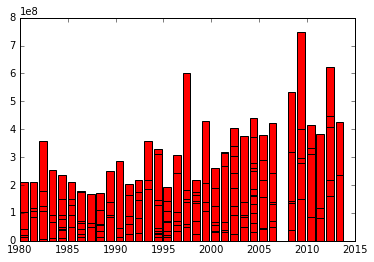

In [372]:
plt.clf()

fig, ax = plt.subplots()

ax.bar(model_df2["Year"], model_df2["Total Gross"],color='red')

plt.show()

In [233]:
counts_by_year_df = model_df[model_df["HasSingle"]==True].groupby(by=['Year']).sum().reset_index()

print(counts_by_year_df.head())

   Year  HasSingle  ChartHot100  ChartHotDance  ChartHipHop  ChartOther
0  1980        6.0          3.0            0.0          0.0         0.0
1  1981        3.0          2.0            0.0          0.0         1.0
2  1982        2.0          1.0            0.0          0.0         0.0
3  1983        2.0          2.0            0.0          0.0         2.0
4  1984        5.0          5.0            0.0          1.0         1.0


In [65]:
counts_by_year_df["HasSingle"].argmax()

16

In [66]:
counts_by_year_df.ix[16]

Year             1996.0
HasSingle          13.0
ChartHot100        11.0
ChartHotDance       1.0
ChartHipHop         4.0
ChartOther          4.0
Name: 16, dtype: float64

In [67]:
counts_by_year_df[['Year',"HasSingle"]]

,Year,HasSingle
0,1980,6.0
1,1981,3.0
2,1982,2.0
3,1983,2.0
4,1984,5.0
5,1985,7.0
6,1986,3.0
7,1987,5.0
8,1988,4.0
9,1989,1.0


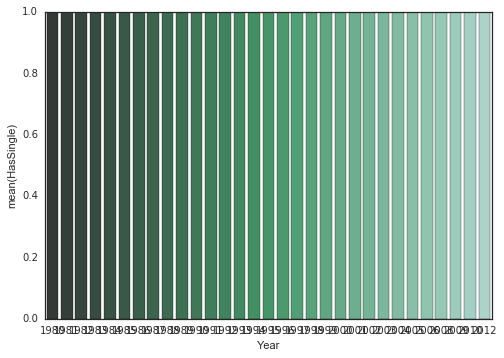

In [421]:
fig, ax = plt.subplots()

data_df1 = model_df[model_df["HasSingle"]==True]
data_df2 = model_df[model_df["ChartHot100"]==True]

sns.barplot(data_df1["Year"], data_df1["HasSingle"], palette="BuGn_d", ax=ax)


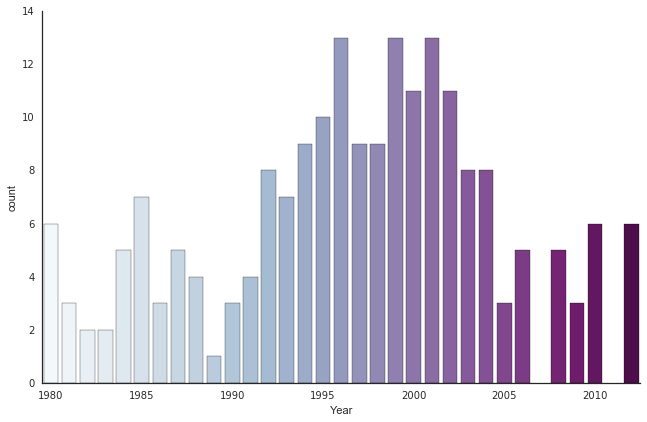

In [419]:
import numpy as np
import seaborn as sns
sns.set(style="white")
years = np.arange(1980, 2013)

data_df1 = model_df[model_df["HasSingle"]==True]
data_df2 = model_df[model_df["ChartHot100"]==True]

#print(data_df.columns)

g = sns.factorplot(x="Year",  data=data_df1, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
#g = sns.factorplot(x="Year",  data=data_df2, kind="count",
#                   palette="BuPu", size=6, aspect=1.5, order=years)

g.set_xticklabels(step=5)


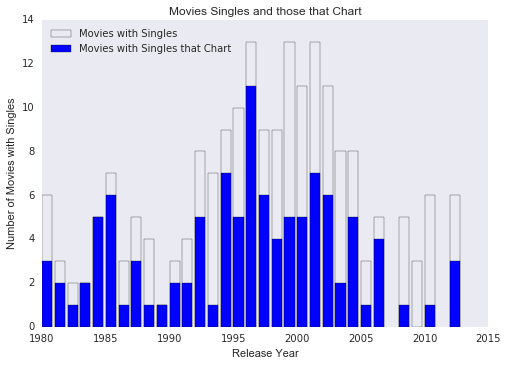

In [436]:


fig, ax = plt.subplots()

sns.set(style="dark")



ax.bar(counts_by_year_df["Year"], counts_by_year_df["HasSingle"],color='',label='Movies with Singles')
ax.bar(counts_by_Hot100_df["Year"], counts_by_Hot100_df["ChartHot100"],color='blue',label='Movies with Singles that Chart')

plt.title("Movies Singles and those that Chart")
plt.xlabel('Release Year')
plt.ylabel('Number of Movies with Singles')
ax.legend(loc='best', shadow=True)


#ax.plot(counts_by_Hot100_df["Year"], counts_by_Hot100_df["ChartHot100"],color='r')

#ax.plot(counts_by_year_df["Year"], counts_by_year_df["HasSingle"])

plt.show()

In [69]:
counts_by_Hot100_df = model_df[model_df["ChartHot100"]==True].groupby(by=['Year']).sum().reset_index()

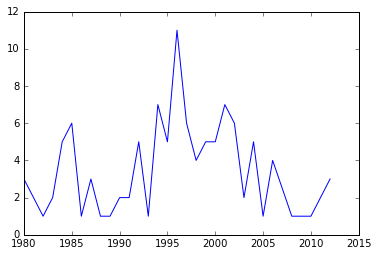

In [70]:
fig, ax = plt.subplots()
#ax.bar(ind, menMeans, width, color='r', yerr=menStd)
ax.plot(counts_by_Hot100_df["Year"], counts_by_Hot100_df["ChartHot100"])
plt.show()

In [237]:
model_df[model_df["Movie Title"].isin(df2["Movie"])==False]

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
0,NaN,Saturn 3,2/15,NaN,NaN,AFD,"$9,000,000",NaN,1980,False,False,False,False,False
1,NaN,Little Miss Marker,3/21,"$853,173",472,Uni.,"$6,321,392",NaN,1980,False,False,False,False,False
2,NaN,The Empire Strikes Back,5/21,"$4,910,483",126,Fox,"$209,398,025","1,278",1980,False,False,False,False,False
3,NaN,Rough Cut,6/20,NaN,NaN,Par.,"$16,656,125",NaN,1980,False,False,False,False,False
4,NaN,The Nude Bomb,5/9,"$3,565,066",793,Uni.,"$14,662,035",NaN,1980,False,False,False,False,False
5,NaN,Urban Cowboy,6/6,NaN,NaN,Par.,"$46,918,287",NaN,1980,False,False,False,False,False
7,NaN,Used Cars,7/18,NaN,NaN,Col.,"$11,715,321",NaN,1980,False,False,False,False,False
8,NaN,Willie & Phil,-,NaN,NaN,Fox,"$4,400,000",NaN,1980,False,False,False,False,False
9,NaN,Any Which Way You Can,12/17,"$8,024,663","1,541",WB,"$70,687,344",NaN,1980,False,False,False,False,False
10,NaN,Cheech & Chong's Next Movie,7/18,"$5,262,963",814,Uni.,"$41,675,194",NaN,1980,False,False,False,False,False


In [244]:
model_df[model_df["Movie Title"].str.contains('Miserables')]

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
16,4/4,Les Miserables,12/25,"$27,281,735","2,814",Uni.,"$148,809,770","2,927",2012,False,False,False,False,False


In [245]:
model_df.dtypes

Close Date          object
Movie Title         object
Open Date           object
Opening Gross       object
Opening Theaters    object
Studio              object
Total Gross         object
Total Theaters      object
Year                 int64
HasSingle             bool
ChartHot100           bool
ChartHotDance         bool
ChartHipHop           bool
ChartOther            bool
dtype: object

In [243]:
df2[df2["Movie"].str.contains('Miserables')]

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
1363,12/25/2012,Les Miserables,65000000.0,"$148,809,770","$442,169,052"


In [246]:
df2.dtypes

Release Date          object
Movie                 object
Production Budget    float64
Domestic Gross        object
Worldwide Gross       object
dtype: object

In [222]:
len(no_prod_df)

1551

In [289]:
#df['Pricing'].replace(to_replace='[^0-9]+', value='',inplace==True,regex=True) 
model_df["Movie Title"].replace(to_replace='\([0-9]+[A-Za-z-]+\)', value='',inplace=True,regex=True)

In [306]:
model_df["Movie Title"].replace(to_replace='\(Re-issue\)', value='',inplace=True,regex=True)

In [321]:
model_df["Movie Title"] = model_df["Movie Title"].apply(lambda x: x.strip())

In [322]:
model_df[model_df["Movie Title"].str.contains('\(')]

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther
35,NaN,Jaws 2 (1980 re-issue),2/15,"$1,382,756",26,Uni.,"$4,028,735",26,1980,False,False,False,False,False
90,NaN,Close Encounters of the Third Kind (Special Ed...,11/14,NaN,NaN,Col.,"$15,693,175",NaN,1980,False,False,False,False,False
92,NaN,Cinderella (1981 re-issue),12/18,"$1,300,000",560,BV,"$28,040,000",NaN,1981,False,False,False,False,False
7,NaN,Vertigo (1983 re-issue),10/28,NaN,NaN,Uni.,"$5,343,461",NaN,1983,False,False,False,False,False
61,NaN,Porky's Revenge (Part III),3/22,"$6,207,507","1,423",Fox,"$20,518,905","1,423",1985,False,False,False,False,False
89,NaN,Follow That Bird (Sesame St.),8/2,"$2,415,626","1,129",WB,"$13,961,370","1,129",1985,False,False,False,False,False
70,NaN,Cinderella (1987 re-issue),11/20,"$5,165,881","1,646",BV,"$34,101,149","1,657",1987,False,False,False,False,False
66,NaN,Across the Sea of Time (IMAX),10/20,"$11,761",2,SPC,"$16,015,639",2,1995,False,False,False,False,False
68,NaN,Wings of Courage (IMAX),4/21,"$8,711",1,SPC,"$15,054,636",11,1995,False,False,False,False,False
63,NaN,Return of the Jedi (Special Edition),3/14,"$16,293,531","2,111",Fox,"$45,470,437","2,111",1997,False,False,False,False,False


In [323]:
df3 = model_df.merge(df2,how='inner',left_on="Movie Title",right_on="Movie")

In [324]:
df3['Total Gross'] = df3['Total Gross'].replace('[\$,]', '', regex=True).astype(float)

In [325]:
len(df3)

1897

In [326]:
df3.head()

,Close Date,Movie Title,Open Date,Opening Gross,Opening Theaters,Studio,Total Gross,Total Theaters,Year,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,NaN,Popeye,12/12,"$6,310,520",901,Par.,49823037.0,901,1980,False,False,False,False,False,12/12/1980,Popeye,20000000.0,"$49,823,037","$49,823,037"
1,NaN,Coal Miner's Daughter,3/7,"$3,366,443",437,Uni.,67182787.0,NaN,1980,True,False,False,False,False,3/7/1980,Coal Miner's Daughter,15000000.0,"$67,182,787","$67,182,787"
2,NaN,Fame,5/16,"$118,160",3,MGM,21202829.0,NaN,1980,False,False,False,False,False,9/25/2009,Fame,18000000.0,"$22,455,510","$80,227,619"
3,NaN,The Awakening,10/31,"$2,728,520",909,WB,8415112.0,NaN,1980,False,False,False,False,False,8/17/2012,The Awakening,4900000.0,"$95,933","$6,924,321"
4,NaN,Caddyshack,7/25,"$3,142,689",656,WB,39846344.0,NaN,1980,False,False,False,False,False,7/25/1980,Caddyshack,6000000.0,"$39,846,344","$39,846,344"


In [327]:
df4 = df3.drop(axis=1,labels=['Close Date','Open Date', 'Opening Gross','Movie Title','Opening Theaters','Studio','Total Theaters','Year','Release Date','Movie','Domestic Gross','Worldwide Gross'])

In [328]:
df4.head()

,Total Gross,HasSingle,ChartHot100,ChartHotDance,ChartHipHop,ChartOther,Production Budget
0,49823037.0,False,False,False,False,False,20000000.0
1,67182787.0,True,False,False,False,False,15000000.0
2,21202829.0,False,False,False,False,False,18000000.0
3,8415112.0,False,False,False,False,False,4900000.0
4,39846344.0,False,False,False,False,False,6000000.0


In [329]:
df4.columns

Index(['Total Gross', 'HasSingle', 'ChartHot100', 'ChartHotDance',
       'ChartHipHop', 'ChartOther', 'Production Budget'],
      dtype='object')

In [330]:
df5 = pd.concat([df4["Total Gross"],df4["Production Budget"],df4.ix[:,1:5].applymap(lambda x: 1 if x else 0)],axis=1)

__Now do the model__

In [331]:
df5["HasSingle"].value_counts()

0    1749
1     148
Name: HasSingle, dtype: int64

In [332]:
sample_model_single_df = df5[df5["HasSingle"]==True]

In [333]:
sample_model_x_single_df = df5[df5["HasSingle"]==False]

In [334]:
print(len(sample_model_single_df))
print(len(sample_model_x_single_df))

148
1749


In [335]:
sample_model_x_single_df2 = sample_model_x_single_df.sample(148)

In [336]:
oversample_model_df = pd.concat([sample_model_single_df,sample_model_x_single_df2])

In [337]:
oversample_model_df.head()

,Total Gross,Production Budget,HasSingle,ChartHot100,ChartHotDance,ChartHipHop
1,67182787.0,15000000.0,1,0,0,0
29,27107960.0,35000000.0,1,1,0,0
44,58972904.0,5500000.0,1,0,0,0
60,31184024.0,20000000.0,1,1,0,0
69,54812802.0,28000000.0,1,1,0,0


In [338]:
X,y = oversample_model_df.drop('Total Gross', axis=1),oversample_model_df['Total Gross']

In [339]:
from sklearn import linear_model


models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.01)
models['elasticnet'] = linear_model.ElasticNet(alpha=.002)

In [340]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        X, y, test_size=0.3)



In [341]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: elasticnet
Score: 0.228514353807
('ChartHotDance', -24259227.844944779)
('HasSingle', 19993640.076890077)
('ChartHot100', 6399319.2814097442)
('ChartHipHop', 175102.05322080769)
('Production Budget', 0.97316871017350648)

Model: lin_reg
Score: 0.228482545457
('ChartHotDance', -26076022.537118569)
('HasSingle', 20170655.113379285)
('ChartHot100', 6291395.2442224417)
('ChartHipHop', 300219.08523598436)
('Production Budget', 0.97316484964084549)

Model: ridge
Score: 0.228461627304
('HasSingle', 19417248.704876788)
('ChartHotDance', -19132011.550536629)
('ChartHot100', 6702913.3421752136)
('ChartHipHop', -113658.87278952803)
('Production Budget', 0.97323784705349914)

Model: lasso
Score: 0.228482545532
('ChartHotDance', -26076021.744935706)
('HasSingle', 20170655.060123332)
('ChartHot100', 6291395.27770954)
('ChartHipHop', 300218.84651680622)
('Production Budget', 0.97316484960324312)



In [342]:
X.columns

Index(['Production Budget', 'HasSingle', 'ChartHot100', 'ChartHotDance',
       'ChartHipHop'],
      dtype='object')

In [343]:
import statsmodels.api as sm

predictors = sm.add_constant(X)

In [344]:
model = sm.OLS(y, X)
results = model.fit()

In [345]:
results.params

Production Budget    1.132764e+00
HasSingle            2.998921e+07
ChartHot100          3.319493e+07
ChartHotDance       -2.366866e+07
ChartHipHop         -2.162602e+07
dtype: float64

In [346]:
predictors.head()

,const,Production Budget,HasSingle,ChartHot100,ChartHotDance,ChartHipHop
1,1,15000000.0,1,0,0,0
29,1,35000000.0,1,1,0,0
44,1,5500000.0,1,0,0,0
60,1,20000000.0,1,1,0,0
69,1,28000000.0,1,1,0,0


In [347]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Gross   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           3.29e-71
Time:                        20:16:17   Log-Likelihood:                -5751.3
No. Observations:                 296   AIC:                         1.151e+04
Df Residuals:                     291   BIC:                         1.153e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Production Budget     1.1328      0.06

In [348]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

In [349]:
rf =RandomForestRegressor(n_estimators = 500 )
rf.fit(X_train, X_train)

a  = X.columns.values

ftr_imp = list(zip(a, rf.feature_importances_))

ftr_imp = sorted(ftr_imp, key=(lambda x: x[1]), reverse = True)

for i in ftr_imp:
    print(i)
#print(rf.score(X_test, y_test))

('Production Budget', 0.99927221870621608)
('ChartHot100', 0.00037254522963791345)
('HasSingle', 0.00035061336352550457)
('ChartHipHop', 4.0560682028213065e-06)
('ChartHotDance', 5.6663241802580906e-07)
